<a href="https://colab.research.google.com/github/ibrahin2024/Tarea-Clasificador-de-cubiertos/blob/main/TAREA_Clasificador_Tenedor_Cuchillo_Cuchara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===========================
# 1️⃣ CREAR CARPETAS Y DESCOMPRIMIR ZIPs
# ===========================
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores


mkdir: cannot create directory ‘cuchillos’: File exists
mkdir: cannot create directory ‘cucharas’: File exists
mkdir: cannot create directory ‘tenedores’: File exists


In [2]:
%cd cuchillos
!unzip cuchillos.zip -d cuchillos
%cd ..
%cd tenedores
!unzip tenedores.zip -d tenedores
%cd ..
%cd cucharas
!unzip cucharas.zip -d cucharas
%cd ..

/content/cuchillos
unzip:  cannot find or open cuchillos.zip, cuchillos.zip.zip or cuchillos.zip.ZIP.
/content
/content/tenedores
unzip:  cannot find or open tenedores.zip, tenedores.zip.zip or tenedores.zip.ZIP.
/content
/content/cucharas
unzip:  cannot find or open cucharas.zip, cucharas.zip.zip or cucharas.zip.ZIP.
/content


In [3]:
# ===========================
# 2️⃣ BORRAR LOS ZIPs
# ===========================
!rm -rf /content/cuchillos/cuchillos.zip
!rm -rf /content/cucharas/cucharas.zip
!rm -rf /content/tenedores/tenedores.zip

In [4]:
# ===========================
# 3️⃣ MOSTRAR CANTIDAD DE IMÁGENES
# ===========================
!ls cuchillos/cuchillos/cuchillos/ | wc -l
!ls cucharas/cucharas/cucharas | wc -l
!ls tenedores/tenedores/tenedores | wc -l

215
147
117


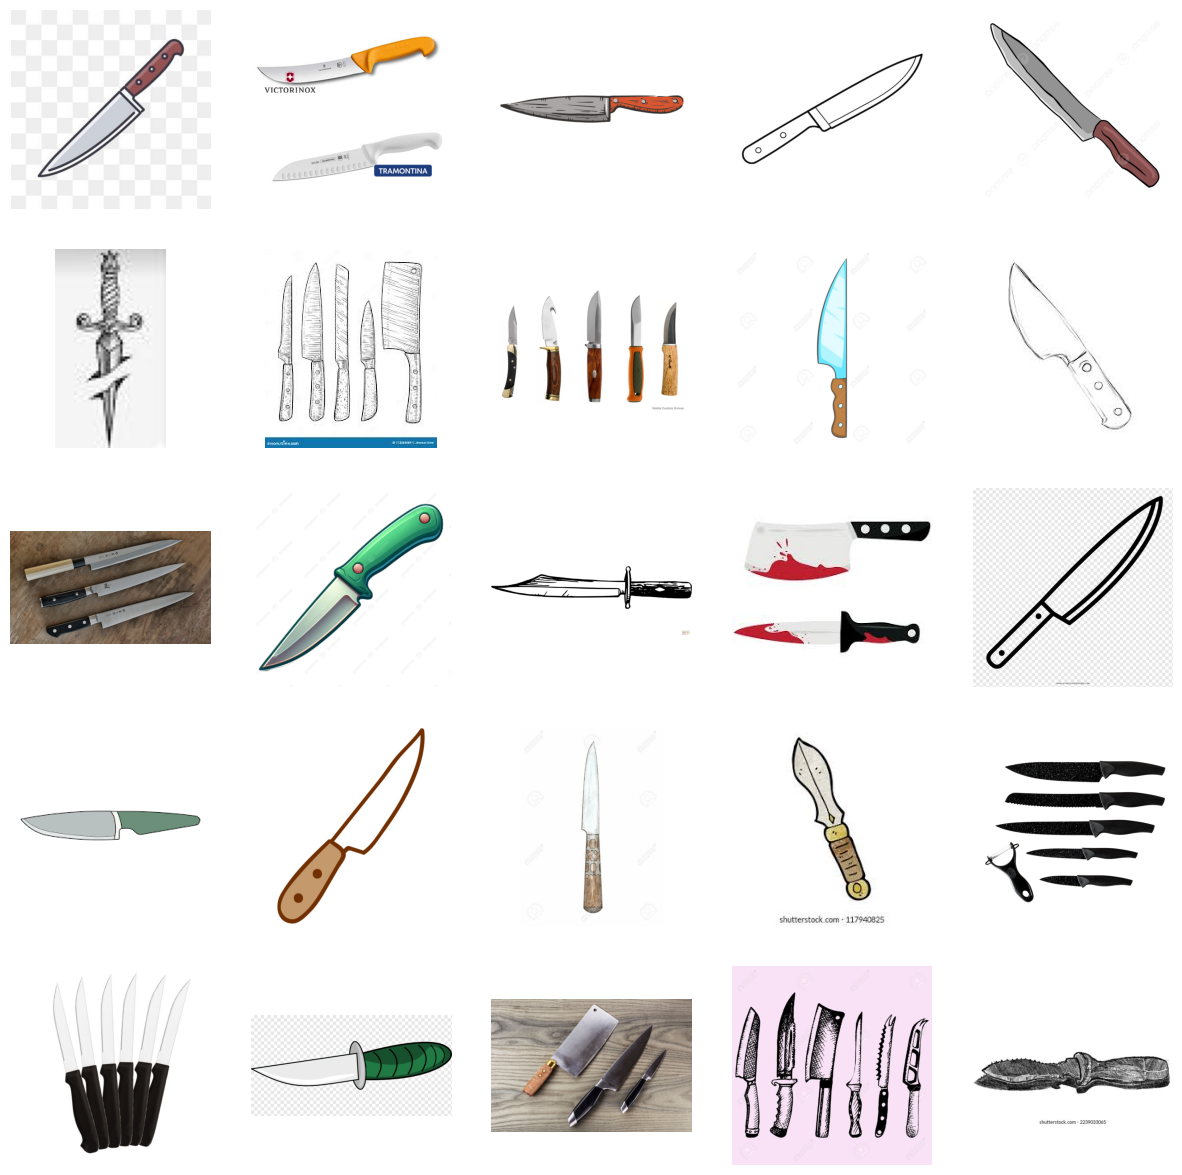

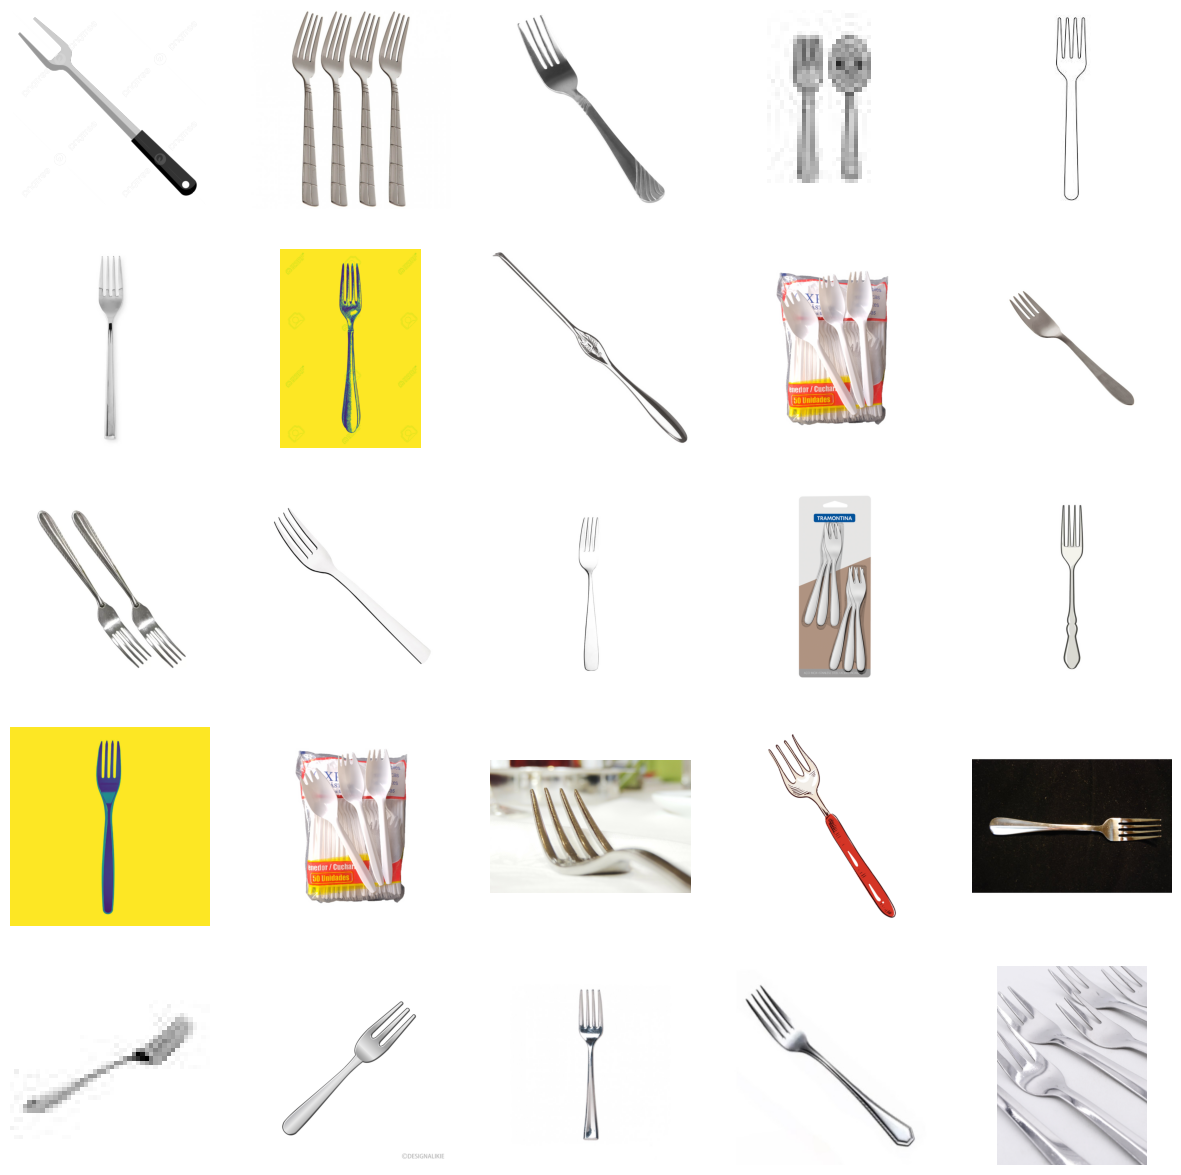

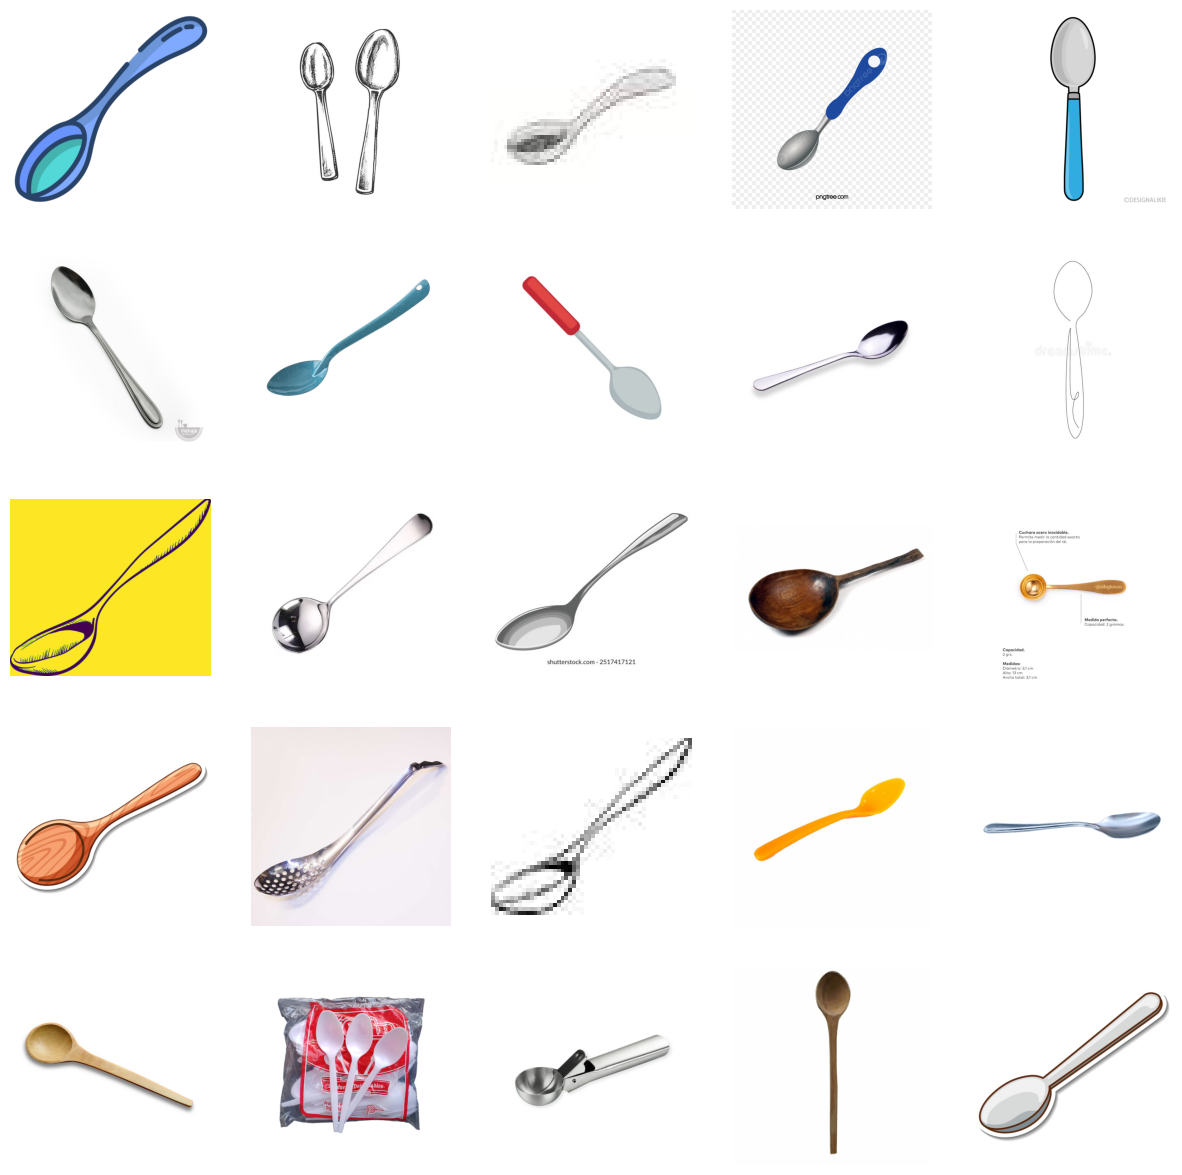

In [5]:
# ===========================
# 4️⃣ MOSTRAR ALGUNAS IMÁGENES
# ===========================
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def mostrar_imagenes(carpeta):
    plt.figure(figsize=(15,15))
    imagenes = os.listdir(carpeta)
    for i, nombreimg in enumerate(imagenes[:25]):
        plt.subplot(5,5,i+1)
        img = mpimg.imread(os.path.join(carpeta, nombreimg))
        plt.imshow(img)
        plt.axis("off")
    plt.show()

mostrar_imagenes("cuchillos/cuchillos/cuchillos")
mostrar_imagenes("tenedores/tenedores/tenedores")
mostrar_imagenes("cucharas/cucharas/cucharas")

In [6]:
# ===========================
# 5️⃣ CREAR DATASET BALANCEADO
# ===========================
import shutil

!mkdir -p dataset/cuchillos/cuchillos
!mkdir -p dataset/tenedores/tenedores
!mkdir -p dataset/cucharas/cucharas

In [7]:
def copiar_imagenes(carpeta_fuente, carpeta_destino, limite=600):
    imagenes = os.listdir(carpeta_fuente)
    for i, nombreimg in enumerate(imagenes):
        if i < limite:
            shutil.copy(os.path.join(carpeta_fuente, nombreimg),
                        os.path.join(carpeta_destino, nombreimg))

copiar_imagenes("cucharas/cucharas/cucharas", "dataset/cucharas/cucharas")
copiar_imagenes("tenedores/tenedores/tenedores", "dataset/tenedores/tenedores")
copiar_imagenes("cuchillos/cuchillos/cuchillos", "dataset/cuchillos/cuchillos")



In [8]:
!ls dataset/cucharas/cucharas | wc -l
!ls dataset/cuchillos/cuchillos | wc -l
!ls dataset/tenedores/tenedores | wc -l

147
215
117


In [9]:
# ===========================
# 6️⃣ AUMENTO DE DATOS
# ===========================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2
)

data_gen_entrenamiento = datagen.flow_from_directory(
    "dataset",
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    subset="training"
)

data_gen_pruebas = datagen.flow_from_directory(
    "dataset",
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    subset="validation"
)

Found 384 images belonging to 3 classes.
Found 95 images belonging to 3 classes.


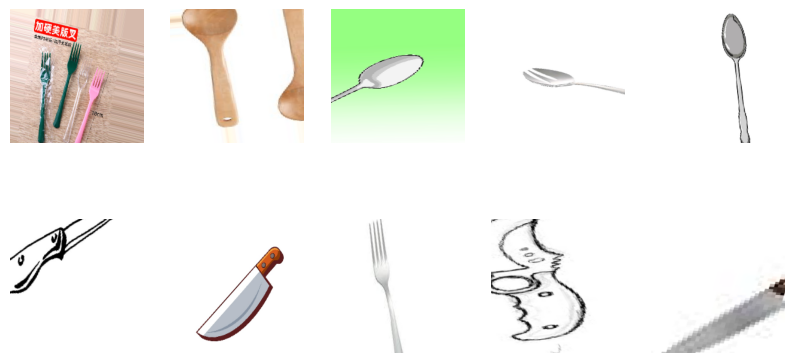

In [10]:
# ===========================
# 7️⃣ VISUALIZAR EJEMPLOS
# ===========================
import numpy as np

imagenes, etiquetas = next(data_gen_entrenamiento)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imagenes[i])
    plt.axis("off")
plt.show()

In [11]:
# ===========================
# 4️⃣ MODELO CON KERAS
# ===========================
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    pooling="avg"
)

base_model.trainable = False  # Congelar pesos

inputs = tf.keras.Input(shape=(224,224,3))
x = base_model(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(3, activation="softmax")(x)

modelo = tf.keras.Model(inputs, outputs)

modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
# ===========================
# 9️⃣ ENTRENAR EL MODELO
# ===========================
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento,
    epochs=EPOCAS,
    validation_data=data_gen_pruebas
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4037 - loss: 1.1368 - val_accuracy: 0.7368 - val_loss: 0.6648
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 805ms/step - accuracy: 0.6750 - loss: 0.7341 - val_accuracy: 0.8737 - val_loss: 0.4599
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 688ms/step - accuracy: 0.7167 - loss: 0.6380 - val_accuracy: 0.8947 - val_loss: 0.3417
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 756ms/step - accuracy: 0.7792 - loss: 0.4998 - val_accuracy: 0.8842 - val_loss: 0.3133
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 761ms/step - accuracy: 0.8561 - loss: 0.4014 - val_accuracy: 0.8632 - val_loss: 0.3429
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 746ms/step - accuracy: 0.8806 - loss: 0.3415 - val_accuracy: 0.8947 - val_loss: 0.2832
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 667ms/step - accuracy: 0.8343 - loss: 0.4083 - val_accuracy: 0.8421 - val_loss: 0.2926
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 762ms/step - accuracy: 0.9009 - loss: 0.2982 - val_accuracy: 0.9053 - val_lo

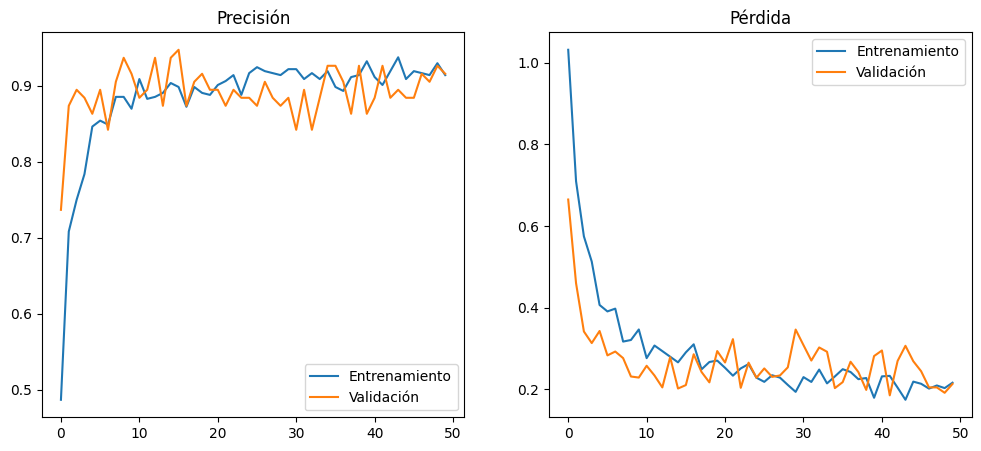

In [13]:
# ===========================
# 🔟 GRAFICAR RESULTADOS
# ===========================
import matplotlib.pyplot as plt

acc = historial.history["accuracy"]
val_acc = historial.history["val_accuracy"]
loss = historial.history["loss"]
val_loss = historial.history["val_loss"]
rango_epocas = range(EPOCAS)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label="Entrenamiento")
plt.plot(rango_epocas, val_acc, label="Validación")
plt.title("Precisión")
plt.legend()

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label="Entrenamiento")
plt.plot(rango_epocas, val_loss, label="Validación")
plt.title("Pérdida")
plt.legend()
plt.show()


In [14]:
# ===========================
# 1️⃣1️⃣ PREDICCIÓN DE UNA IMAGEN ONLINE
# ===========================
from PIL import Image
import requests
from io import BytesIO
import numpy as np

# Etiquetas en el mismo orden que las carpetas del dataset
CLASES = ["cuchara", "cuchillo", "tenedor"]

def categorizar(url):
    resp = requests.get(url)
    resp.raise_for_status()  # Lanza error si la descarga falla

    img = Image.open(BytesIO(resp.content)).convert("RGB")
    img = img.resize((224,224))
    img_array = np.array(img)/255.0

    pred = modelo.predict(img_array.reshape(1,224,224,3))
    indice = np.argmax(pred[0])

    return CLASES[indice]

# URL de prueba
url = "https://images.deprati.com.ec/sys-master/images/h9b/ha1/11211653316638/16594209-0_product_1200Wx1800H"
print("Predicción:", categorizar(url))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicción: cuchara


In [15]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

# Etiquetas en el mismo orden que las carpetas del dataset
CLASES = ["cuchara", "cuchillo", "tenedor"]

def categorizar(url):
    resp = requests.get(url)
    resp.raise_for_status()  # Lanza error si la descarga falla

    img = Image.open(BytesIO(resp.content)).convert("RGB")
    img = img.resize((224,224))
    img_array = np.array(img)/255.0

    pred = modelo.predict(img_array.reshape(1,224,224,3))
    indice = np.argmax(pred[0])

    return CLASES[indice]

# URL de prueba
url = "https://img.freepik.com/vector-gratis/ilustracion-icono-vector-dibujos-animados-cuchillo-flotante-concepto-icono-objeto-comida-aislado-vector-premium_138676-5784.jpg"
print("Predicción:", categorizar(url))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicción: cuchillo


In [16]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

# Etiquetas en el mismo orden que las carpetas del dataset
CLASES = ["cuchara", "cuchillo", "tenedor"]

def categorizar(url):
    resp = requests.get(url)
    resp.raise_for_status()  # Lanza error si la descarga falla

    img = Image.open(BytesIO(resp.content)).convert("RGB")
    img = img.resize((224,224))
    img_array = np.array(img)/255.0

    pred = modelo.predict(img_array.reshape(1,224,224,3))
    indice = np.argmax(pred[0])

    return CLASES[indice]

# URL de prueba
url = "https://irvix.com.ec/180-large_default/tenedor-de-entrada-1810-linea-windsor.jpg"
print("Predicción:", categorizar(url))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción: tenedor


In [17]:
!pip install tensorflowjs

import tensorflowjs as tfjs

# Convierte el modelo a formato TF.js
tfjs.converters.save_keras_model(modelo, "modelo_tfjs")

print("✅ Modelo exportado para TensorFlow.js en la carpeta modelo_tfjs/")


failed to lookup keras version from the file,
    this is likely a weight only file
✅ Modelo exportado para TensorFlow.js en la carpeta modelo_tfjs/
